## Dengan Model Pre-trained model "candra/indobertweet-sentiment2"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./MBG-data-cleaned.csv')
df.head()

,created_at,full_text,favorite_count,quote_count,reply_count,retweet_count,tweet_url
0,Wed Oct 08 23:50:38 +0000 2025,Program Makan Bergizi Gratis (MBG) bukan cuma ...,0,0,0,0,https://x.com/undefined/status/197607277842936...
1,Wed Oct 08 23:50:00 +0000 2025,Langkah cepat dari Istana Presiden Prabowo Sub...,0,0,0,0,https://x.com/undefined/status/197607261960789...
2,Wed Oct 08 23:49:40 +0000 2025,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,0,0,0,0,https://x.com/undefined/status/197607253622089...
3,Wed Oct 08 23:49:01 +0000 2025,@wordsmithtobe @somexthread Pengen makan sehat...,0,0,0,0,https://x.com/undefined/status/197607237186295...
4,Wed Oct 08 23:48:28 +0000 2025,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,0,0,0,0,https://x.com/undefined/status/197607223054421...


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      5011 non-null   object
 1   full_text       5011 non-null   object
 2   favorite_count  5011 non-null   int64 
 3   quote_count     5011 non-null   int64 
 4   reply_count     5011 non-null   int64 
 5   retweet_count   5011 non-null   int64 
 6   tweet_url       5011 non-null   object
dtypes: int64(4), object(3)
memory usage: 274.2+ KB
None


In [4]:
print(df.shape)

(5011, 7)


In [5]:
df['full_text'].values[6]

'Gubernur Lemhanas Ace Hasan Dorong Tata Kelola MBG Lebih Baik Target 82 Juta Penerima Harus Tercapai https://t.co/C3RQykf285 #61tahunpartaigolkar #partaigolkar #bahlillahadalia #golkarpedia #AceHasanSyadzily https://t.co/6eicW3X4Dd'

### Clean Data

In [6]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL yang ada di data 'full_text'
    text = re.sub(r"@\w+", '', text)                     # hapus mention yang ada di data 'full_text'
    text = re.sub(r"#\w+", '', text)                     # hapus hashtag yang ada di data 'full_text'
    text = re.sub(r"_", '', text)                        # hapus underscore yang ada di data 'full_text'
    text = re.sub(r"[^\w\s]", '', text)                  # hapus tanda baca yang ada di data 'full_text'
    text = re.sub(r"[^\w\s%Rp]", '', text)               # hapus tanda baca kecuali % dan Rp
    text = text.lower().strip()                          # huruf kecil & hapus spasi berlebih
    return text

In [7]:
df['cleaned_full_text'] = df['full_text'].apply(clean_text)

df.head()

,created_at,full_text,favorite_count,quote_count,reply_count,retweet_count,tweet_url,cleaned_full_text
0,Wed Oct 08 23:50:38 +0000 2025,Program Makan Bergizi Gratis (MBG) bukan cuma ...,0,0,0,0,https://x.com/undefined/status/197607277842936...,program makan bergizi gratis mbg bukan cuma se...
1,Wed Oct 08 23:50:00 +0000 2025,Langkah cepat dari Istana Presiden Prabowo Sub...,0,0,0,0,https://x.com/undefined/status/197607261960789...,langkah cepat dari istana presiden prabowo sub...
2,Wed Oct 08 23:49:40 +0000 2025,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,0,0,0,0,https://x.com/undefined/status/197607253622089...,tiada hari tanpa keracunan mbg
3,Wed Oct 08 23:49:01 +0000 2025,@wordsmithtobe @somexthread Pengen makan sehat...,0,0,0,0,https://x.com/undefined/status/197607237186295...,pengen makan sehat aja dia ngarepin posyandu k...
4,Wed Oct 08 23:48:28 +0000 2025,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,0,0,0,0,https://x.com/undefined/status/197607223054421...,goblog ndhuwe dapur mbg piro pak


In [10]:
df['cleaned_full_text'].values[5]

'anakanak smp ini vibesnya happy banget lagi pada nikmatin mbg bareng tementemen bukan cuma isi perut tapi isi energi buat mimpi besar mereka program mbg emang real banget manfaatnya bikin belajar makin semangat badan makin sehat'

In [11]:
df = df.drop_duplicates(subset=['full_text'])
df = df.dropna(subset='full_text')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4831 entries, 0 to 5010
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   created_at         4831 non-null   object
 1   full_text          4831 non-null   object
 2   favorite_count     4831 non-null   int64 
 3   quote_count        4831 non-null   int64 
 4   reply_count        4831 non-null   int64 
 5   retweet_count      4831 non-null   int64 
 6   tweet_url          4831 non-null   object
 7   cleaned_full_text  4831 non-null   object
dtypes: int64(4), object(4)
memory usage: 339.7+ KB


### Load Model Pre-trained Model

In [14]:
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification

model_id = "candra/indobertweet-sentiment2"

tokenizer = AutoTokenizer.from_pretrained(model_id)
tf_model = TFAutoModelForSequenceClassification.from_pretrained(model_id, from_pt=True)

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=tf_model,
    tokenizer=tokenizer,
    framework="tf",
    device=-1
)

text = df['cleaned_full_text'].values[5]
print(sentiment_pipeline(text))

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertFo

[{'label': 'positive', 'score': 0.999602735042572}]


In [15]:
text = df['cleaned_full_text'].values[4]
print(sentiment_pipeline(text))

[{'label': 'negative', 'score': 0.9126104712486267}]


### Anlysis tweet using pre-trained model

In [16]:
from tqdm import tqdm
import numpy as np

results = []

# Pastikan tqdm menampilkan progress
tqdm.pandas()

for text in tqdm(df["cleaned_full_text"].fillna("").values, desc="Analisis sentimen"):
    try:
        # Skip jika teks terlalu pendek (misal kosong)
        if len(text.strip()) == 0:
            results.append({"label": "unknown", "score": np.nan})
            continue

        result = sentiment_pipeline(text)
        results.append(result[0])
    except Exception as e:
        # Tangani error agar loop tidak berhenti
        results.append({"label": "error", "score": np.nan})
        print(f"Error pada teks: {text[:50]}... -> {e}")

# Masukkan hasil ke DataFrame
df["sentiment"] = [r["label"] for r in results]
df["score"] = [r["score"] for r in results]

df.head()

Analisis sentimen: 100%|██████████| 4831/4831 [53:35<00:00,  1.50it/s]



,created_at,full_text,favorite_count,quote_count,reply_count,retweet_count,tweet_url,cleaned_full_text,sentiment,score
0,Wed Oct 08 23:50:38 +0000 2025,Program Makan Bergizi Gratis (MBG) bukan cuma ...,0,0,0,0,https://x.com/undefined/status/197607277842936...,program makan bergizi gratis mbg bukan cuma se...,positive,0.997955
1,Wed Oct 08 23:50:00 +0000 2025,Langkah cepat dari Istana Presiden Prabowo Sub...,0,0,0,0,https://x.com/undefined/status/197607261960789...,langkah cepat dari istana presiden prabowo sub...,positive,0.868299
2,Wed Oct 08 23:49:40 +0000 2025,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,0,0,0,0,https://x.com/undefined/status/197607253622089...,tiada hari tanpa keracunan mbg,neutral,0.996068
3,Wed Oct 08 23:49:01 +0000 2025,@wordsmithtobe @somexthread Pengen makan sehat...,0,0,0,0,https://x.com/undefined/status/197607237186295...,pengen makan sehat aja dia ngarepin posyandu k...,negative,0.975037
4,Wed Oct 08 23:48:28 +0000 2025,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,0,0,0,0,https://x.com/undefined/status/197607223054421...,goblog ndhuwe dapur mbg piro pak,negative,0.912610


In [22]:
df.head(100)

,created_at,full_text,favorite_count,quote_count,reply_count,retweet_count,tweet_url,cleaned_full_text,sentiment,score
0,Wed Oct 08 23:50:38 +0000 2025,Program Makan Bergizi Gratis (MBG) bukan cuma ...,0,0,0,0,https://x.com/undefined/status/197607277842936...,program makan bergizi gratis mbg bukan cuma se...,positive,0.997955
1,Wed Oct 08 23:50:00 +0000 2025,Langkah cepat dari Istana Presiden Prabowo Sub...,0,0,0,0,https://x.com/undefined/status/197607261960789...,langkah cepat dari istana presiden prabowo sub...,positive,0.868299
2,Wed Oct 08 23:49:40 +0000 2025,@Jateng_Twit @kabarklaten Tiada hari tanpa ker...,0,0,0,0,https://x.com/undefined/status/197607253622089...,tiada hari tanpa keracunan mbg,neutral,0.996068
3,Wed Oct 08 23:49:01 +0000 2025,@wordsmithtobe @somexthread Pengen makan sehat...,0,0,0,0,https://x.com/undefined/status/197607237186295...,pengen makan sehat aja dia ngarepin posyandu k...,negative,0.975037
4,Wed Oct 08 23:48:28 +0000 2025,@KangManto123 Goblog. Ndhuwe dapur MBG piro pak?,0,0,0,0,https://x.com/undefined/status/197607223054421...,goblog ndhuwe dapur mbg piro pak,negative,0.912610
...,...,...,...,...,...,...,...,...,...,...
95,Wed Oct 08 22:47:43 +0000 2025,68.950 siswa di Kota Bengkulu kini merasakan m...,0,0,0,0,https://x.com/undefined/status/197605694613133...,68950 siswa di kota bengkulu kini merasakan ma...,positive,0.998757
96,Wed Oct 08 22:47:32 +0000 2025,Dari petani hingga anak sekolah Program MBG ha...,2,0,0,0,https://x.com/undefined/status/197605689624847...,dari petani hingga anak sekolah program mbg ha...,positive,0.998814
97,Wed Oct 08 22:47:14 +0000 2025,Dari petani hingga anak sekolah Program MBG ha...,2,0,0,0,https://x.com/undefined/status/197605682306206...,dari petani hingga anak sekolah program mbg ha...,positive,0.998814
98,Wed Oct 08 22:46:57 +0000 2025,@Narasi_winda Prabowo untuk kepentingan politi...,2,0,0,0,https://x.com/undefined/status/197605675313891...,prabowo untuk kepentingan politik kaum yaman d...,negative,0.997273


In [23]:

for col in df.columns:
    try:
        if pd.api.types.is_datetime64tz_dtype(df[col]):
            df[col] = df[col].dt.tz_convert(None)
    except Exception:
        # jika kolom bukan datetime atau terjadi masalah, lewati saja
        pass

# export hasil ke excel
df.to_excel('sentiment_analysis_results.xlsx', index=False)
print("Data berhasil diekspor ke file 'sentiment_analysis_results1.xlsx'")

C:\Users\ramadhani.pratama\AppData\Local\Temp\ipykernel_25084\157774637.py:3: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df[col]):


Data berhasil diekspor ke file 'sentiment_analysis_results1.xlsx'


### Visualisasi Hasil

C:\Users\ramadhani.pratama\AppData\Local\Temp\ipykernel_25084\1557829454.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


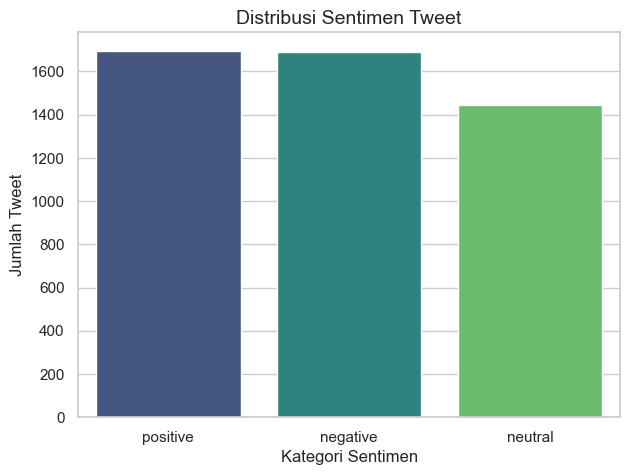

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Hitung jumlah tiap sentimen
sentiment_counts = df["sentiment"].value_counts()

# Buat bar chart
plt.figure(figsize=(7,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

plt.title("Distribusi Sentimen Tweet", fontsize=14)
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

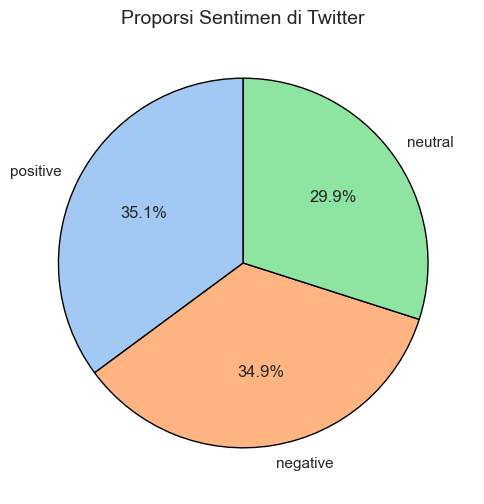

In [20]:
plt.figure(figsize=(6,6))
colors = sns.color_palette("pastel")

df["sentiment"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Proporsi Sentimen di Twitter", fontsize=14)
plt.ylabel("")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramadhani.pratama\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


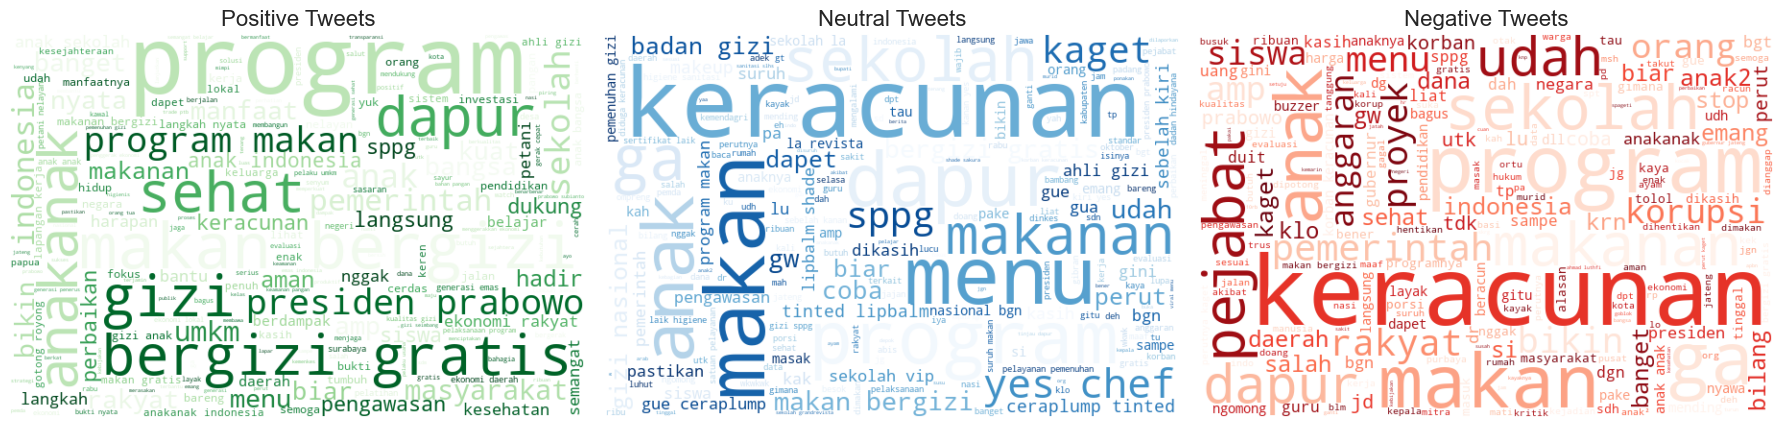

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Unduh stopwords jika belum
nltk.download('stopwords')

# Ambil stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Tambahkan stopword custom (kata umum yang tidak informatif di Twitter)
custom_stopwords = {"yg", "rt", "https", "co", "dan", "aja", "nih", "sih", "nya", "kalo", "mbg", "ya", "tuh", "gak", "gk", }
stop_words.update(custom_stopwords)

# Gabungkan tweet berdasarkan kategori sentiment
positive_tweets = " ".join(df[df["sentiment"] == "positive"]["cleaned_full_text"].dropna())
neutral_tweets  = " ".join(df[df["sentiment"] == "neutral"]["cleaned_full_text"].dropna())
negative_tweets = " ".join(df[df["sentiment"] == "negative"]["cleaned_full_text"].dropna())

# Fungsi untuk membuat wordcloud dengan stopword
def generate_wordcloud(text, colormap):
    return WordCloud(
        width=600,
        height=400,
        background_color="white",
        stopwords=stop_words,
        colormap=colormap
    ).generate(text)

# Visualisasi WordCloud untuk setiap sentiment
plt.figure(figsize=(18, 6))

# Positive
plt.subplot(1, 3, 1)
wc_pos = generate_wordcloud(positive_tweets, "Greens")
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets", fontsize=16)

# Neutral
plt.subplot(1, 3, 2)
wc_neu = generate_wordcloud(neutral_tweets, "Blues")
plt.imshow(wc_neu, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Tweets", fontsize=16)

# Negative
plt.subplot(1, 3, 3)
wc_neg = generate_wordcloud(negative_tweets, "Reds")
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets", fontsize=16)

plt.tight_layout()
plt.show()
